## Introduction:

This section in the textbook is about the relative percentile rank .. 

### Ex:
I recently ran the James Joyce Ramble 10K in Dedham MA. The results are available from http://coolrunning.com/results/10/ma/Apr25_27thAn_set1.shtml.

1. Go to that page and find my results. I came in 97th in a field of 1633, so what is my percentile rank in the field?
   In my division (M4049 means “male between 40 and 49 years of age”) I came in 26th out of 256. 
   What is my percentile   rank in my division? 
   
2. If I am still running in 10 years (and I hope I am), I will be in the M5059 division. Assuming that my percentile rank in my division is the same, how much slower should I expect to be? 

3. I maintain a friendly rivalry with a student who is in the F2039 division. How fast does she have to run her next 10K to “beat” me in terms of percentile ranks?

In [6]:
import Cdf
import relay
import relay_soln
import csv
import Pmf
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline 

## Solution Steps:

1. Calc. the speed given the first age.
2. Extract the speeds of the participants within the same age group.
3. divide the two results to calc. the relative speeds given the input ages.

In [4]:
res = relay.ReadResults()

In [12]:
speeds = relay.GetSpeeds(res)

In [8]:
cdf = Cdf.MakeCdfFromList(speeds, 'speeds')

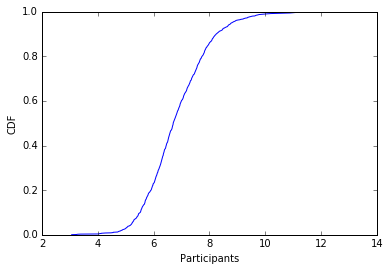

In [13]:
plt.plot(cdf.xs, cdf.ps)
plt.xlabel('Participants')
plt.ylabel('CDF')

In [14]:
## find the percentile rank of runner .. 

def Percentile_Rank(scores, your_score):
    count = 0
    
    for score in scores:
        if score <= your_score:
            count += 1

    percentile_rank = 100.0 * count / len(scores)
    
    return percentile_rank

In [19]:
author_speed = speeds[-1]  
author_speed

('1633', '448/448', 'F2039', '2:03:26', '2:01:47', '19:36')

To make sure that this is the desired speed .. let's find its corresponding record .. 

In [20]:
res[-1]

('1633', '448/448', 'F2039', '2:03:26', '2:01:47', '19:36')

In [21]:
perc_rank = Percentile_Rank(speeds, author_speed)
perc_rank

0.06265664160401002

Resanable result .. as the rank of the author in the race was the least .. 

hence, all the competitors were better then him .. 

this is why his percentile rank was very tiny .. 

To assure this way of thinking .. let's calc the percentile rank of the winner (speeds[0]) ..  that is expected to be 100% .. which means that he beats 100% of the participants .. 

In [23]:
perc_rank = Percentile_Rank(speeds, speeds[0])
perc_rank

100.0

## 1. Division of M4049:

In [39]:
res = relay.ReadResults()
res[0:10]

[('1', '1/362', 'M2039', '30:43', '30:42', '4:57'),
 ('2', '2/362', 'M2039', '31:36', '31:36', '5:06'),
 ('3', '3/362', 'M2039', '31:42', '31:42', '5:07'),
 ('4', '4/362', 'M2039', '32:28', '32:27', '5:14'),
 ('5', '5/362', 'M2039', '32:52', '32:52', '5:18'),
 ('6', '6/362', 'M2039', '33:06', '33:06', '5:20'),
 ('7', '1/256', 'M4049', '33:33', '33:33', '5:24'),
 ('8', '2/256', 'M4049', '33:42', '33:42', '5:26'),
 ('9', '3/256', 'M4049', '33:54', '33:54', '5:28'),
 ('10', '7/362', 'M2039', '33:56', '33:56', '5:28')]

In [40]:
res[2][2]  # test the desired column .. 

'M2039'

In [48]:
M4049 = []
for i in res:
    if(i[:][2] == 'M4049'):
        M4049.append(i)  # list of speeds within the input age group(unconverted)

In [50]:
speeds_M4049 = relay.GetSpeeds(M4049)
speeds_M4049[1:10]

[11.042944785276074,
 10.97560975609756,
 10.81081081081081,
 10.526315789473683,
 9.782608695652174,
 9.75609756097561,
 9.677419354838712,
 9.651474530831099,
 9.498680738786279]

In [52]:
len(speeds_M4049)

256

In [54]:
speeds_M4049[26] ## the author's speed ..

8.591885441527447

Let's calc. his percentile rank .. 

In [57]:
perc_rank_M4049 = Percentile_Rank(speeds_M4049, speeds_M4049[26])
perc_rank_M4049

89.84375

:D .. his percetile rank in his division is about 89.8% .. 

## 2. Division of M5059:

Assuming that my percentile rank in my division is the same, how much slower should I expect to be? ..

Hence, I gonna calc. the actual percentile rank for him with respect to his new age group .. and then subtract the given percentile rank from ..

In [59]:
M5059 = []
for i in res:
    if(i[:][2] == 'M5059'):
        M5059.append(i)  # list of speeds within the input age group(unconverted)

In [61]:
speeds_M5059 = relay.GetSpeeds(M5059)
speeds_M5059[1:10]

[9.549071618037136,
 9.375,
 9.022556390977442,
 8.955223880597014,
 8.91089108910891,
 8.80195599022005,
 8.61244019138756,
 8.49056603773585,
 8.352668213457076]

In [62]:
speeds_M5059[26]  ## same speed position .. 

7.843137254901961

In [63]:
perc_rank_M5059 = Percentile_Rank(speeds_M5059, speeds_M5059[26])
perc_rank_M5059

85.38011695906432

Hence, difference is .. 

In [64]:
perc_rank_M4049 - perc_rank_M5059

4.463633040935676

## Conclusion:

His percentile rank is expected to be about 4.46% less than the given speed .. given his age group of 50-59 

## 3. Division of F2039:

I maintain a friendly rivalry with a student who is in the F2039 division. 

How fast does she have to run her next 10K to “beat” me in terms of percentile ranks?

In [65]:
## her speed .. 

F2039 = []
for i in res:
    if(i[:][2] == 'F2039'):
        F2039.append(i)  # list of speeds within the input age group(unconverted)   

In [67]:
speeds_F2039 = relay.GetSpeeds(F2039)

Now, I need the speed of that girl .. the point is she is the least one in the whole race .. and consiquantly, she is the least one in her age group .. 

In [68]:
speeds_F2039[-1]

3.0612244897959187

In [69]:
perc_rank_F2039 = Percentile_Rank(speeds_F2039, speeds_F2039[-1])
perc_rank_F2039

0.22321428571428573

This means that her speed is better than about 22% of the competitors in her age group .. 


In [73]:
## to calc the rate .. i have to divide the speeds .. 
speeds_M5059[26] / speeds_F2039[-1]

2.5620915032679736

This means that he is faster than her double and half .. per 1 Km ..

She has to reach this speed per 1 Km to be able to beat him.